Found 200 images belonging to 2 classes.
Found 175 images belonging to 2 classes.
Found 121 images belonging to 2 classes.
Print the class binary: {'dimnit': 0, 'nazli': 1}
Image data shape: (200, 511, 511, 4)
Labels shape: (200,)
Training set images shape: (160, 511, 511, 4)
Training set labels shape: (160,)
Testing set images shape: (40, 511, 511, 4)
Testing set labels shape: (40,)
Accuracy: 72.50%


TypeError: Invalid shape (1044484,) for image data

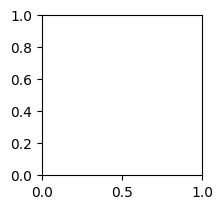

In [9]:
## Neural Network Models for Combined Classification and Regression

# Import library
import requests, zipfile, shutil, os
requests.packages.urllib3.disable_warnings()
from PIL import Image
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the URL to download the dataset #https://www.muratkoklu.com/datasets/
dataset_url = "https://www.muratkoklu.com/datasets/vtdhnd10.php"

# Download the dataset to a temporary file
response = requests.get(dataset_url)
with open("Grapevine_Leaves_Image_Dataset.zip", "wb") as f:
    f.write(response.content)

# Extract the dataset from the ZIP file
with zipfile.ZipFile("Grapevine_Leaves_Image_Dataset.zip", "r") as zip_ref:
    zip_ref.extractall()

# Delete the temporary ZIP file
os.remove("Grapevine_Leaves_Image_Dataset.zip")

# Define the source directories for the downloaded images
dimnit_dir = "./Grapevine_Leaves_Image_Dataset/Dimnit/"
nazli_dir = "./Grapevine_Leaves_Image_Dataset/Nazli/"

# Define the directories for train, test, and validation sets for both categories
train_dir_dimnit = "./Grapevine_Leaves_Image_Dataset/train/dimnit"
test_dir_dimnit = "./Grapevine_Leaves_Image_Dataset/test/dimnit"
validation_dir_dimnit = "./Grapevine_Leaves_Image_Dataset/validation/dimnit"

train_dir_nazli = "./Grapevine_Leaves_Image_Dataset/train/nazli"
test_dir_nazli = "./Grapevine_Leaves_Image_Dataset/test/nazli"
validation_dir_nazli = "./Grapevine_Leaves_Image_Dataset/validation/nazli"

# Create directories for train, test, and validation sets for both categories
for directory in [train_dir_dimnit, test_dir_dimnit, validation_dir_dimnit,
                  train_dir_nazli, test_dir_nazli, validation_dir_nazli]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Define the number of images to copy for each set
train_images = 70
test_images = 20
validation_images = 10

# Copy Dimnit images
dimnit_image_files = os.listdir(dimnit_dir)
np.random.shuffle(dimnit_image_files)

# Train set
for i in range(train_images):
    source_path = os.path.join(dimnit_dir, dimnit_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/train/dimnit/", dimnit_image_files[i])
    shutil.copy2(source_path, destination_path)

# Test set
for i in range(train_images, train_images + test_images):
    source_path = os.path.join(dimnit_dir, dimnit_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/test/dimnit/", dimnit_image_files[i])
    shutil.copy2(source_path, destination_path)

# Validation set
for i in range(train_images + test_images, train_images + test_images + validation_images):
    source_path = os.path.join(dimnit_dir, dimnit_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/validation/dimnit/", dimnit_image_files[i])
    shutil.copy2(source_path, destination_path)

# Copy Nazli images
nazli_image_files = os.listdir(nazli_dir)
np.random.shuffle(nazli_image_files)

# Train set
for i in range(train_images):
    source_path = os.path.join(nazli_dir, nazli_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/train/nazli/", nazli_image_files[i])
    shutil.copy2(source_path, destination_path)

# Test set
for i in range(train_images, train_images + test_images):
    source_path = os.path.join(nazli_dir, nazli_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/test/nazli/", nazli_image_files[i])
    shutil.copy2(source_path, destination_path)

# Validation set
for i in range(train_images + test_images, train_images + test_images + validation_images):
    source_path = os.path.join(nazli_dir, nazli_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/validation/nazli/", nazli_image_files[i])
    shutil.copy2(source_path, destination_path)

# Define the path to the downloaded dataset
train_dir = "./Grapevine_Leaves_Image_Dataset/train/"
test_dir = "./Grapevine_Leaves_Image_Dataset/test/"
validation_dir = "./Grapevine_Leaves_Image_Dataset/validation/"

# # Image data preprocessing
# train_imagerescale = ImageDataGenerator(rescale=1./255) ### RGB to convert 0,1
# test_imagerescale = ImageDataGenerator(rescale=1./255)  ### RGB to convert 0,1
# validation_imagerescale = ImageDataGenerator(rescale=1./255)  ### RGB to convert 0,1

# train_images = train_imagerescale.flow_from_directory(
#     train_dir,
#     target_size = (128, 128),
#     class_mode = 'binary'
# )

# test_images = test_imagerescale.flow_from_directory(
#     test_dir,
#     target_size = (128, 128),
#     class_mode = 'binary'
# )

# validation_images = validation_imagerescale.flow_from_directory(
#     validation_dir,
#     target_size = (128, 128),
#     class_mode = 'binary'
# )
# print(f"Print the class binary: {train_images.class_indices}")

# # Initialize empty NumPy arrays to store the image data and labels
# image_data = []
# labels = []

# # Iterate over the Dimnit images and add them to the arrays
# for filename in os.listdir(train_dir_dimnit):
#     image = Image.open(os.path.join(train_dir_dimnit, filename))
#     image_data.append(np.array(image))
#     labels.append(0)  # Label Dimnit as 0

# # Iterate over the Nazli images and add them to the arrays
# for filename in os.listdir(train_dir_nazli):
#     image = Image.open(os.path.join(train_dir_nazli, filename))
#     image_data.append(np.array(image))
#     labels.append(1)  # Label Nazli as 1

# Convert the lists to NumPy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Print the shapes of the image data and labels arrays
print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

train_set_dimnit, test_set_dimnit, train_set_nazli, test_set_nazli = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set images shape:", train_set_dimnit.shape)
print("Training set labels shape:", train_set_nazli.shape)
print("Testing set images shape:", test_set_dimnit.shape)
print("Testing set labels shape:", test_set_nazli.shape)

# Flatten the images
train_set_dimnit = train_set_dimnit.reshape(train_set_dimnit.shape[0], -1)
test_set_dimnit = test_set_dimnit.reshape(test_set_dimnit.shape[0], -1)

# Create and train a logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(train_set_dimnit, train_set_nazli)

# Predict using the trained model
pred = logistic_regression_model.predict(test_set_dimnit)


# Calculate accuracy
accuracy = accuracy_score(test_set_nazli, pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


plt.figure(figsize=(12, 8))
for i in range(10):  # Plot the first 10 images for demonstration
    plt.subplot(2, 5, i + 1)
    # plt.imshow(test_set_dimnit[i].reshape(128, 128, 3))  # Reshape to the original image shape
    plt.imshow(test_set_dimnit[i])  # Reshape to the original image shape
    title = "Correct" if test_set_nazli[i] == pred[i] else "Incorrect"
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()



import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic data for illustration purposes
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()





/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.65


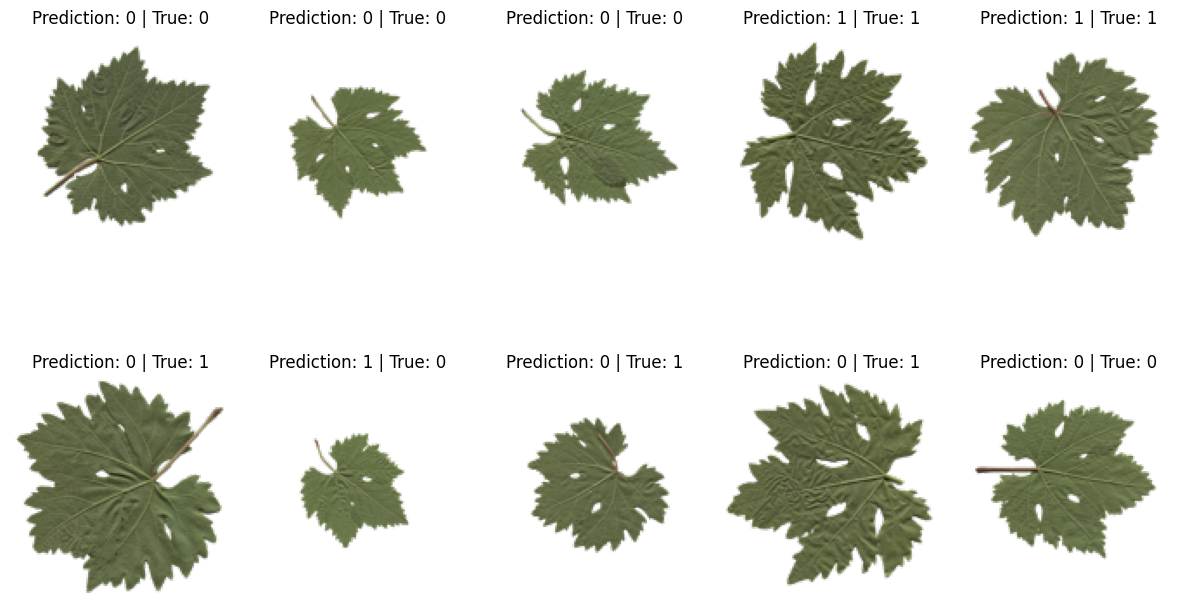

In [16]:

# Define the URL to download the dataset #https://www.muratkoklu.com/datasets/
dataset_url = "https://www.muratkoklu.com/datasets/vtdhnd10.php"

# Download the dataset to a temporary file
response = requests.get(dataset_url)
with open("Grapevine_Leaves_Image_Dataset.zip", "wb") as f:
    f.write(response.content)

# Extract the dataset from the ZIP file
with zipfile.ZipFile("Grapevine_Leaves_Image_Dataset.zip", "r") as zip_ref:
    zip_ref.extractall()

# Delete the temporary ZIP file
os.remove("Grapevine_Leaves_Image_Dataset.zip")

# Define the source directories for the downloaded images
dimnit_dir = "./Grapevine_Leaves_Image_Dataset/Dimnit/"
nazli_dir = "./Grapevine_Leaves_Image_Dataset/Nazli/"

# Define the directories for train, test, and validation sets for both categories
train_dir_dimnit = "./Grapevine_Leaves_Image_Dataset/train/dimnit"
test_dir_dimnit = "./Grapevine_Leaves_Image_Dataset/test/dimnit"
validation_dir_dimnit = "./Grapevine_Leaves_Image_Dataset/validation/dimnit"

train_dir_nazli = "./Grapevine_Leaves_Image_Dataset/train/nazli"
test_dir_nazli = "./Grapevine_Leaves_Image_Dataset/test/nazli"
validation_dir_nazli = "./Grapevine_Leaves_Image_Dataset/validation/nazli"

# Create directories for train, test, and validation sets for both categories
for directory in [train_dir_dimnit, test_dir_dimnit, validation_dir_dimnit,
                  train_dir_nazli, test_dir_nazli, validation_dir_nazli]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Define the number of images to copy for each set
train_images = 70
test_images = 20
validation_images = 10

# Copy Dimnit images
dimnit_image_files = os.listdir(dimnit_dir)
np.random.shuffle(dimnit_image_files)

# Train set
for i in range(train_images):
    source_path = os.path.join(dimnit_dir, dimnit_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/train/dimnit/", dimnit_image_files[i])
    shutil.copy2(source_path, destination_path)

# Test set
for i in range(train_images, train_images + test_images):
    source_path = os.path.join(dimnit_dir, dimnit_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/test/dimnit/", dimnit_image_files[i])
    shutil.copy2(source_path, destination_path)

# Validation set
for i in range(train_images + test_images, train_images + test_images + validation_images):
    source_path = os.path.join(dimnit_dir, dimnit_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/validation/dimnit/", dimnit_image_files[i])
    shutil.copy2(source_path, destination_path)

# Copy Nazli images
nazli_image_files = os.listdir(nazli_dir)
np.random.shuffle(nazli_image_files)

# Train set
for i in range(train_images):
    source_path = os.path.join(nazli_dir, nazli_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/train/nazli/", nazli_image_files[i])
    shutil.copy2(source_path, destination_path)

# Test set
for i in range(train_images, train_images + test_images):
    source_path = os.path.join(nazli_dir, nazli_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/test/nazli/", nazli_image_files[i])
    shutil.copy2(source_path, destination_path)

# Validation set
for i in range(train_images + test_images, train_images + test_images + validation_images):
    source_path = os.path.join(nazli_dir, nazli_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/validation/nazli/", nazli_image_files[i])
    shutil.copy2(source_path, destination_path)

# Define the path to the downloaded dataset
train_dir = "./Grapevine_Leaves_Image_Dataset/train/"
test_dir = "./Grapevine_Leaves_Image_Dataset/test/"
validation_dir = "./Grapevine_Leaves_Image_Dataset/validation/"




import os
import numpy as np
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess the images
images = []
labels = []

# Iterate over the Dimnit images and add them to the arrays
for filename in os.listdir(train_dir_dimnit):
    image = Image.open(os.path.join(train_dir_dimnit, filename))
    image = image.resize((128, 128))  # Resize the image to 128x128
    image = np.array(image) / 255.0  # Normalize pixel values to range [0, 1]
    images.append(image)
    labels.append(0)  # Label Dimnit as 0

# Iterate over the Nazli images and add them to the arrays
for filename in os.listdir(train_dir_nazli):
    image = Image.open(os.path.join(train_dir_nazli, filename))
    image = image.resize((128, 128))  # Resize the image to 128x128
    image = np.array(image) / 255.0  # Normalize pixel values to range [0, 1]
    images.append(image)
    labels.append(1)  # Label Nazli as 1

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# # Split the data into training and testing sets
# from sklearn.model_selection import train_test_split

# train_set_dimnit, test_set_dimnit, train_labels_dimnit, test_set_nazli = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# # Flatten the images
# train_set_dimnit = train_set_dimnit.reshape(train_set_dimnit.shape[0], -1)
# test_set_dimnit = test_set_dimnit.reshape(test_set_dimnit.shape[0], -1)

# # Create and train a logistic regression model
# logistic_regression_model = LogisticRegression(max_iter=1000)
# logistic_regression_model.fit(train_set_dimnit, train_labels_dimnit)

# # Predict using the trained model
# test_predictions = logistic_regression_model.predict(test_set_dimnit)

# # Calculate accuracy
# accuracy = np.mean(test_predictions == test_labels)
# print('Accuracy:', accuracy)




# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(train_images.reshape(len(train_images), -1), train_labels)  # Flatten images before fitting

# Predict labels on the testing set
test_predictions = model.predict(test_images.reshape(len(test_images), -1))  # Flatten test images

# Calculate accuracy
accuracy = np.mean(test_predictions == test_labels)
print('Accuracy:', accuracy)

# Visualize some correctly and incorrectly classified images
plt.figure(figsize=(12, 8))
for i in range(10):
    image = test_images[i]
    prediction = test_predictions[i]
    true_label = test_labels[i]

    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title('Prediction: {} | True: {}'.format(prediction, true_label))
    plt.axis('off')

plt.tight_layout()
plt.show()


In [15]:
# Create and train a logistic regression model
model = LogisticRegression()
model.fit(train_images.reshape(len(train_images), -1), train_labels)  # Flatten images before fitting

# Predict labels on the testing set
test_predictions = model.predict(test_set_dimnit.reshape(len(test_set_dimnit), -1))  # Flatten test images

# Visualize some correctly and incorrectly classified images
plt.figure(figsize=(12, 8))
for i in range(10):
  image = test_set_dimnit[i]
  prediction = test_predictions[i]
  true_label = test_set_nazli[i]

  plt.subplot(2, 5, i + 1)
  plt.imshow(image)
  plt.title('Prediction: {} | True: {}'.format(prediction, true_label))
  plt.axis('off')

plt.tight_layout()
plt.show()

ValueError: X has 1044484 features, but LogisticRegression is expecting 65536 features as input.

Sources
github.com/TanishqSinghAnand/Digit-Detection-app
github.com/Seoyangsam/emotion_detection-
github.com/lemonjchung/Final-Project-Group7